# Jupyter notebooks
Here, we explain how to visualize VeloxChem results in the Jupyter Notebook. The calculation can either be performed and visualized in the Jupyter Notebook or the results can be imported from a VeloxChem h5 file and then visualized.
## Molecular structure

In Jupyter notebook, a Veloxchem molecule object can be visualize using the show function. This is powevered by Py3DMol. The atom_indices and atom_labels options can be used.

**Directly from a Jupyter Notebook cell**

In [1]:
import veloxchem as vlx
molecule = vlx.Molecule.read_smiles('C1=CC=C(C=C1)C(=O)O')
molecule.show(atom_indices=True, atom_labels=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**From an h5 file**

In [2]:
biph_dict = vlx.read_results("../output_files/biphenyl-scf.h5", label="scf")
biph = vlx.Molecule.from_dict(biph_dict)
biph.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Structure optimization


**Directly from a Jupyter Notebook cell**

In [3]:
molecule = vlx.Molecule.read_smiles('CCO')
basis = vlx.MolecularBasis.read(molecule, 'def2-svp')

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_drv.xcfun = 'b3lyp'
scf_drv.dispersion = 'd4'
results = scf_drv.compute(molecule, basis)

opt_drv = vlx.OptimizationDriver(scf_drv)
opt_results = opt_drv.compute(molecule, basis, results)
opt_drv.show_convergence(opt_results)

interactive(children=(IntSlider(value=7, description='step', max=7), Output()), _dom_classes=('widget-interact…

**From an h5 file**

In [4]:
opt_results = vlx.read_results("../output_files/bithio-S0-opt.h5", label="opt")
opt_drv.show_convergence(opt_results)

interactive(children=(IntSlider(value=13, description='step', max=13), Output()), _dom_classes=('widget-intera…

## Spectrum plotting


**Directly from a Jupyter Notebook cell**

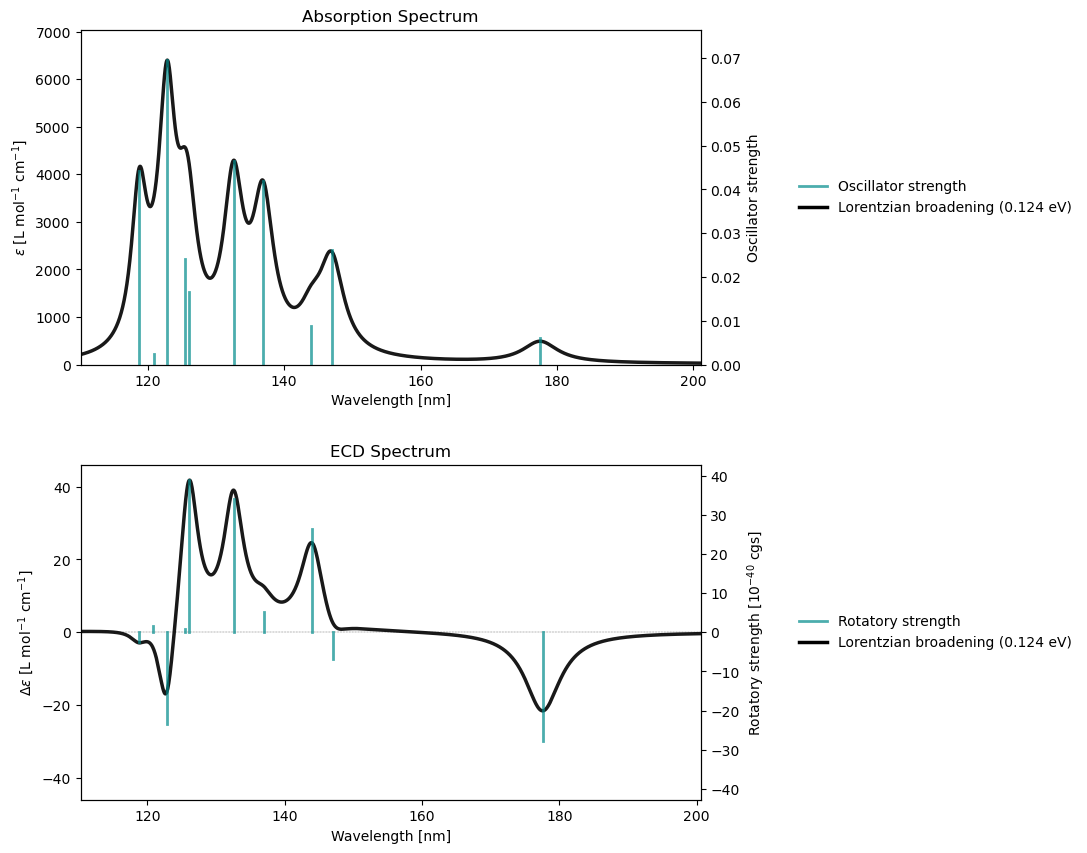

In [5]:
molecule = vlx.Molecule.read_smiles('CCO')
basis = vlx.MolecularBasis.read(molecule, 'def2-svp')

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_drv.xcfun = 'b3lyp'
results = scf_drv.compute(molecule, basis)

rsp_drv = vlx.lreigensolver.LinearResponseEigenSolver()
rsp_drv.ostream.mute()
rsp_drv.nstates = 10
rsp_drv.nto = True
rsp_results = rsp_drv.compute(molecule, basis, results)
rsp_drv.plot(rsp_results)



**From an h5 file**

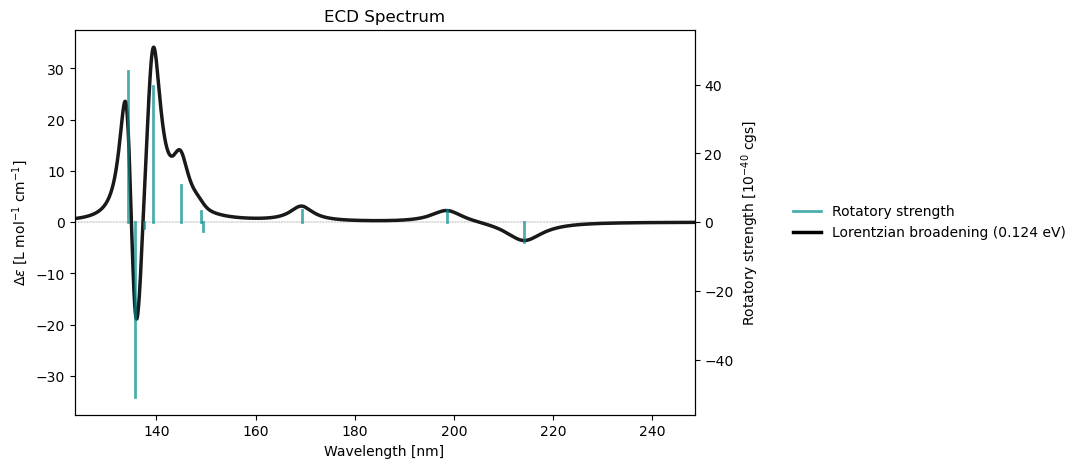

In [6]:
rsp_results = vlx.read_results("../output_files/alanine-ecd.h5", label="rsp")
rsp_drv.plot_ecd(rsp_results)

## Normal modes

**Directly from a Jupyter Notebook cell**

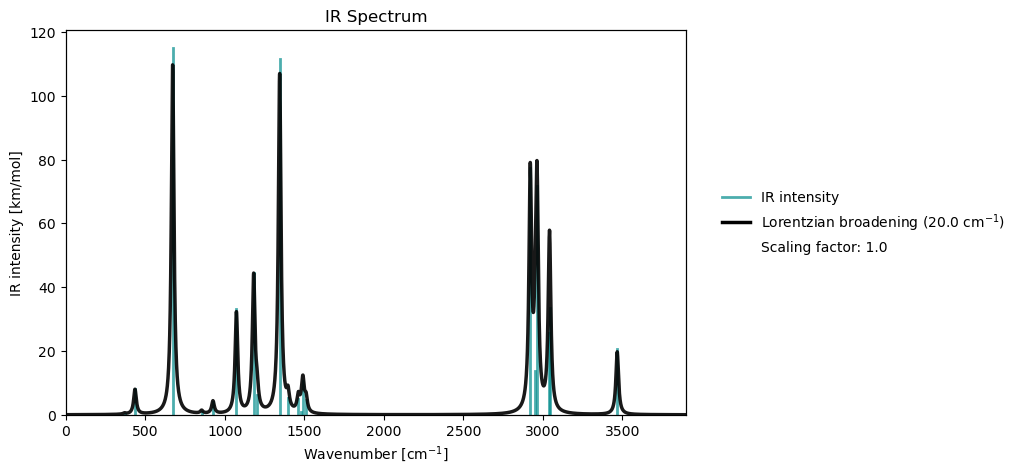

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
molecule = vlx.Molecule.read_smiles('CCO')
basis = vlx.MolecularBasis.read(molecule, 'def2-svp')

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
scf_drv.xcfun = 'b3lyp'
results = scf_drv.compute(molecule, basis)

vib_drv = vlx.VibrationalAnalysis(scf_drv)
vib_drv.ostream.mute()
vib_results = vib_drv.compute(molecule, basis)
vib_drv.plot(vib_results)
vib_drv.animate(vib_results, mode=14)

**From an h5 file**

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

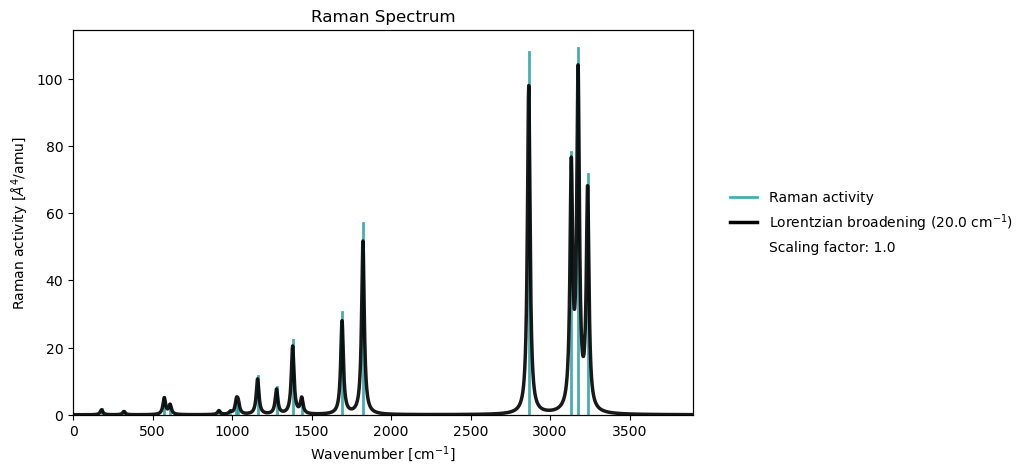

In [14]:
vib_results = vlx.read_results("../output_files/acro-raman.h5", label="vib")
vib_drv.plot_raman(vib_results)
vib_drv.animate(vib_results, mode=14)
